In [1]:
# QUESTIONS:

# did all groups use the same target region area?

# Make Functions for plotting routine -> one notebook for all regions




In [1]:
#### Necessary libraries ####

import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import datetime                 # Datetime is a package to deal with dates.
import pandas as pd
from Functions import * 
import pylab
from combine_data import read_data,read_precip_era5

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
#----------------------------------------
# Figure settings
#----------------------------------------
small=18
font = {
        'weight' : 'normal',
        'size'   : small}
pylab.rc('font', **font)
pylab.rcParams['figure.figsize'] = (15.0, 10.0)
pylab.rcParams['xtick.major.pad']='10'
pylab.rcParams['ytick.major.pad']='15'
ms=10


# Data loading

In [9]:

########################################################
## INPUT soecifications ###
########################################################
case='Scotland'
path_to_data= "/net/thermo/atmosdyn/irist/msd_intercomparison/cloud_files_Leiden/new_data_July2024/" #"./"

########################################################
## import model runs                                  ##
########################################################
ds_sources = read_data(path_to_data, case)

########################################################
## WRF-WVT                                            ##
########################################################
# Just csv file because of nature of simulations #
csv_wrf_wvt = pd.read_csv(path_to_data+'/'+case+'/results WRF-WVT/'+case+'Case_Final.csv', sep=';', decimal=',',index_col=0)

########################################################
## precipitation                                      ##
########################################################
precip_era5=read_precip_era5(path_to_data,case,exclude=['results Ru_Xu_FLEXPART','results WAM2layers','results TRACMASS Dipanjan Dey'])


Loading wam2layers data for Scotland
Loading 2ldrm data for Scotland
Loading utrack data for Scotland
Loading btrims data for Scotland
Loading tracmass data for Scotland
Loading ughent data for Scotland
Loading UIB data for Scotland
Loading UniVie data for Scotland
Loading CHc data for Scotland
Loading xu data for Scotland
Loading tatfancheng data for Scotland
Loading uvigo data for Scotland
results 2LDRM
results FLEXPART_WaterSip_TatFanCheng
results UGhent HAMSTER
results Utrack Arie Staal
results WRF-WVT
results B-TrIMS
results Ru_Xu_FLEXPART
results UiB FLEXPART WaterSip
results Uvigo
results CHc LAGRANTO
results TRACMASS Dipanjan Dey
results univie FLEXPART
results WAM2layers


# Plotting ERA5 precipitation

2LDRM
FLEXPART-WaterSip (TFC) Ens1
FLEXPART-HAMSTER Ens5
UTrack Ens2
WRF_WVT
B-TrIMS
FLEXPART-WaterSip (UiB)
FLEXPART-LATTIN (UVigo)
LAGRANTO-WaterSip (CHc)
FLEXPART-WaterSip (UniVie)


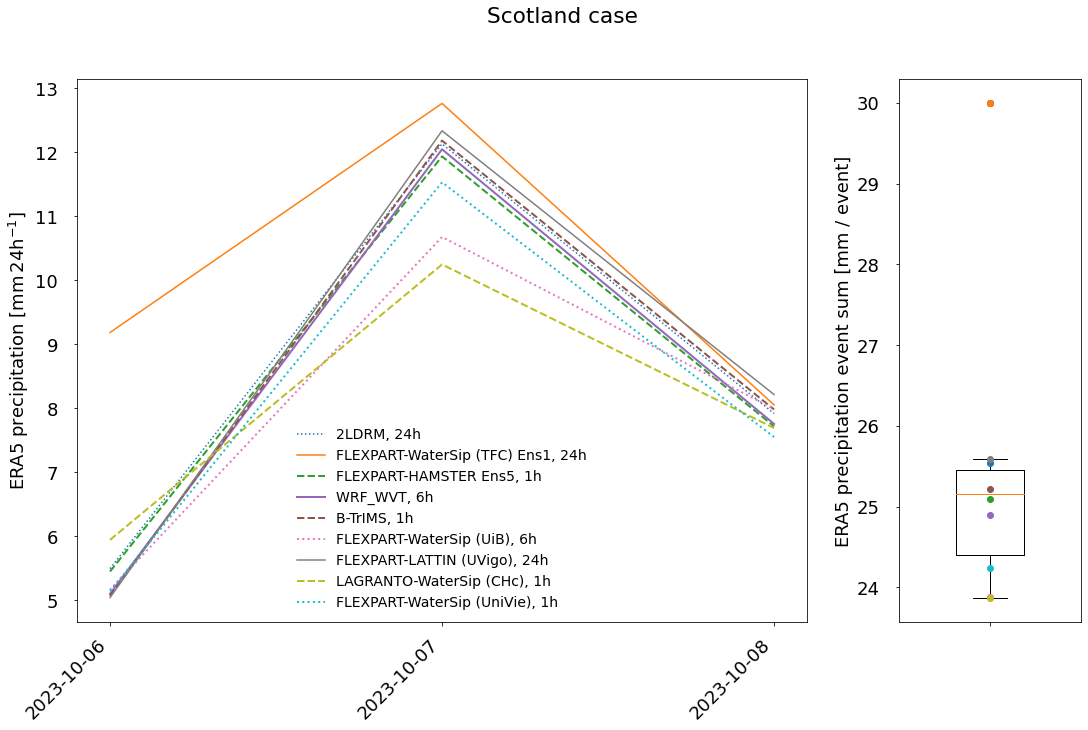

In [10]:
#### PLOTTING precipitation time series ####

plot_precip(precip_era5,case,'./',False)


# Plotting region attributions

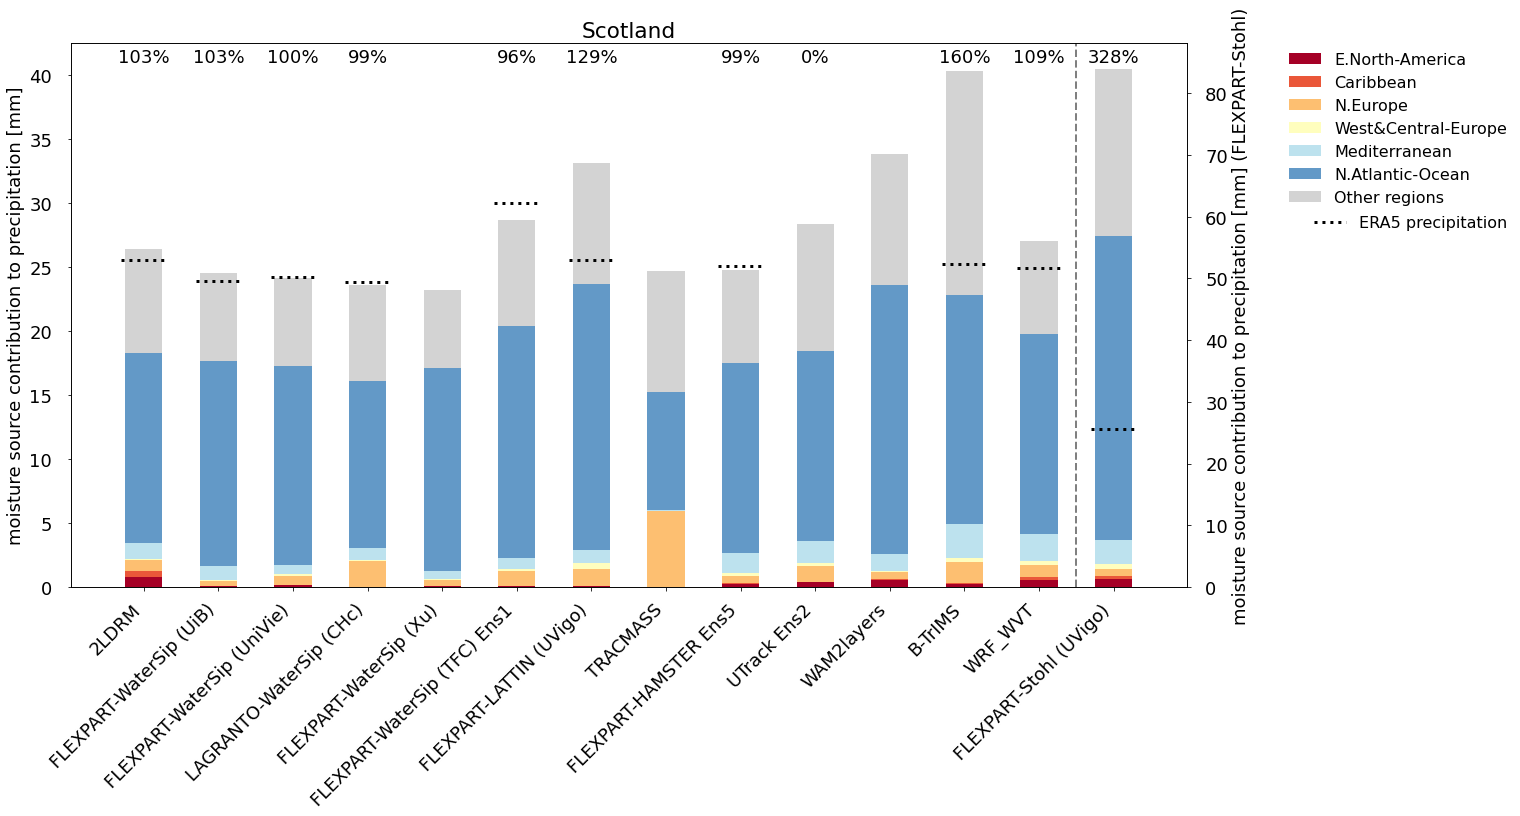

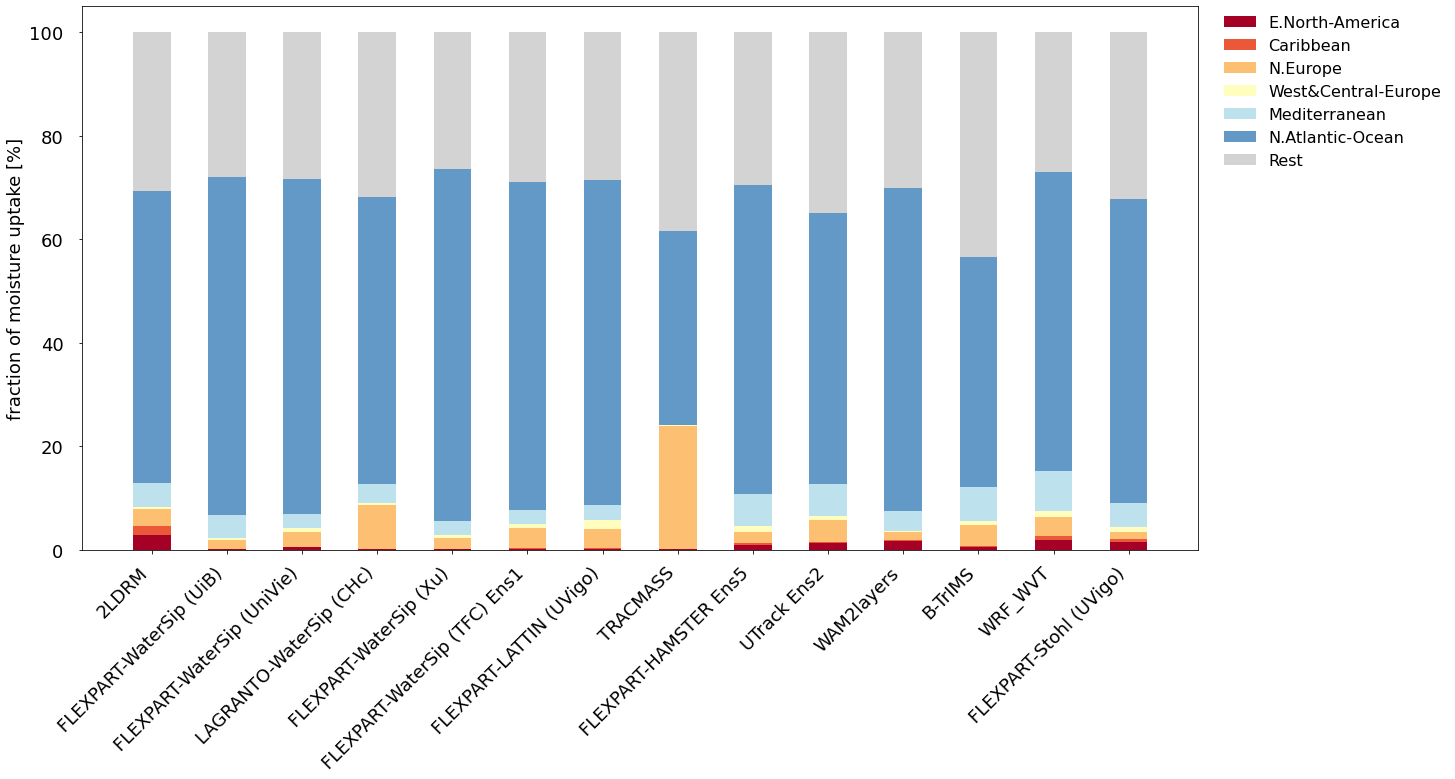

In [11]:
#### model runs for plotting ####

list_reordered = ['2LDRM',
 'FLEXPART-WaterSip (UiB)',
 'FLEXPART-WaterSip (UniVie)',
 'LAGRANTO-WaterSip (CHc)',
 'FLEXPART-WaterSip (Xu)',
 'FLEXPART-WaterSip (TFC) Ens1',
 'FLEXPART-LATTIN (UVigo)',
 'TRACMASS',
 #'FLEXPART-HAMSTER Ens1',
 #'FLEXPART-HAMSTER Ens2',
 #'FLEXPART-HAMSTER Ens3',
 #'FLEXPART-HAMSTER Ens4',
 'FLEXPART-HAMSTER Ens5',
 #'UTrack Ens1',
 'UTrack Ens2',
 #'UTrack Ens3',
 #'UTrack Ens4',
 #'UTrack Ens5',
 'WAM2layers',
 'B-TrIMS',
 'FLEXPART-Stohl (UVigo)']

all_maps = {kk:ds_sources[kk] for kk in list_reordered}
all_maps = xr.Dataset(all_maps)

#### region attribution ####
all_maps_frac_regional,all_maps_regional,precip_sums=calculate_region_attr(all_maps,csv_wrf_wvt,case,path_to_data)

#### plotting absolute regional source attributions ####
plot_abs_regional(all_maps_regional,csv_wrf_wvt,precip_sums,precip_era5,list_reordered,'./',False,case)



#### plotting fractional regional source attributions ####
plot_frac_regional(all_maps_frac_regional,csv_wrf_wvt,list_reordered,'./',False,case)

